# Erkundung des BioImage Archive
In diesem Notebook verwenden wir das [bia-explorer](https://github.com/BioImage-Archive/bia-explorer) Projekt, um den [S-BIAD634 Datensatz](https://www.ebi.ac.uk/bioimage-archive/galleries/S-BIAD634-ai.html) im [Bio-image Archive](https://www.ebi.ac.uk/bioimage-archive) zu erkunden. Wir werden einige Bilder herunterladen und in einem lokalen Verzeichnis speichern.

In [1]:
from bia_explorer import io, biostudies
from skimage.io import imread, imsave
from IPython.display import display, Markdown
import stackview

## Zugriff auf Metadaten
Zuerst greifen wir auf die Metadaten der Datensätze zu. Hier können wir zum Beispiel sehen, wofür die Daten verwendet werden können und unter welcher Lizenz sie genutzt werden können.

In [2]:
accession = 'S-BIAD634'
submission = biostudies.load_submission(accession)

for a in submission.section.attributes:
    name = a.name
    short_value = str(a.value)
    
    print(f"{name} : {short_value}")

Title : An annotated fluorescence image dataset for training nuclear segmentation methods
Description : This dataset contains annotated fluorescent nuclear images of normal or cancer cells from different tissue origins and sample preparation types, and can be used to train machine-learning based nuclear image segmentation algorithms. It consists of 79 expert-annotated fluorescence images of immuno and DAPI stained samples containing 7813 nuclei in total. In addition, the dataset is heterogenous in aspects such as type of preparation, imaging modality, magnification, signal-to-noise ratio and other technical aspects. Relevant parameters, e.g. diagnosis, magnification, signal-to-noise ratio and modality with respect to the type of preparation are provided in the file list. The images are derived from one Schwann cell stroma-rich tissue (from a ganglioneuroblastoma) cryosection (10 images/2773 nuclei), seven neuroblastoma (NB) patients (19 images/931 nuclei), one Wilms patient (1 image/10

Wir können auch sehen, wie viele Bilder im Datensatz enthalten sind.

In [3]:
study = io.load_bia_study(accession)

len(study.images)

388

## Visualisierung von Bildern

Ein einzelnes Bild kann so geladen und angezeigt werden ([Siehe auch](https://github.com/BioImage-Archive/bia-explorer/issues/3)).

In [4]:
image = study.images[0]
image

BIAImage(uri='https://www.ebi.ac.uk/biostudies/files/S-BIAD634/dataset\\groundtruth\\Ganglioneuroblastoma_0.tif', size=2239668, fpath=WindowsPath('dataset/groundtruth/Ganglioneuroblastoma_0.tif'))

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)
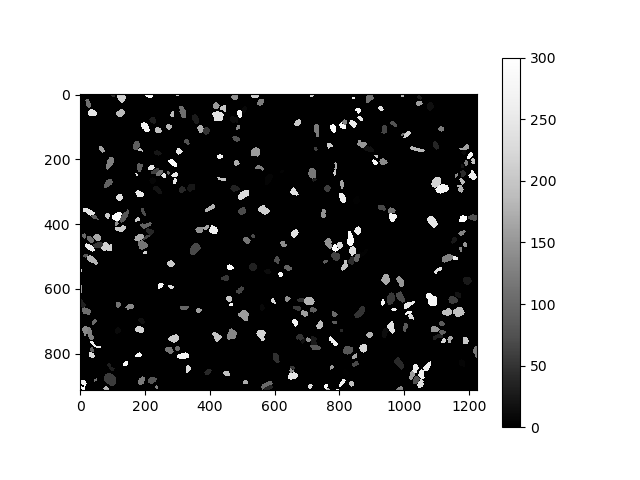
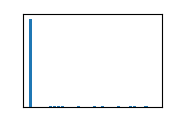

In [5]:
uri = image.uri.replace("\\", "/")
image_data = imread(uri)
stackview.insight(image_data)

Um eine Vorstellung von der Ordnerstruktur innerhalb der Datensätze zu bekommen, können wir Pfade auf dem Server ausgeben.

In [6]:
# print out filenames of some images
for image in study.images[:5] + study.images[-5:]:
    print(str(image.fpath))

dataset\groundtruth\Ganglioneuroblastoma_0.tif
dataset\groundtruth\Ganglioneuroblastoma_1.tif
dataset\groundtruth\Ganglioneuroblastoma_10.tif
dataset\groundtruth\Ganglioneuroblastoma_2.tif
dataset\groundtruth\Ganglioneuroblastoma_3.tif
dataset\rawimages\otherspecimen_5.tif
dataset\rawimages\otherspecimen_6.tif
dataset\rawimages\otherspecimen_7.tif
dataset\rawimages\otherspecimen_8.tif
dataset\rawimages\otherspecimen_9.tif


## Daten herunterladen
Bevor wir ausgewählte Bilder herunterladen, müssen wir sicherstellen, dass der Ordner existiert, in dem wir die Daten speichern möchten.

In [7]:
import os

def ensure_folder_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

base_folder = f"../../data/{accession}"
raw_folder = f"../../data/{accession}/images"
groundtruth_folder = f"../../data/{accession}/groundtruth"

ensure_folder_exists(base_folder)
ensure_folder_exists(raw_folder)
ensure_folder_exists(groundtruth_folder)

Als Nächstes laden wir alle Rohbilder und Ground-Truth-Annotationen aller Datensätze herunter, die "Ganglioneuroblastoma" in ihrem Namen enthalten. Wir laden die Dateien auch nur herunter, falls sie noch nicht heruntergeladen wurden.

In [8]:
for image in study.images:
    if "Ganglioneuroblastoma" in str(image.fpath):
        uri = image.uri.replace("\\", "/")
        filename = uri.split("/")[-1]
        if "\\rawimages\\" in str(image.fpath):
            target_file = raw_folder + "/" + filename
            if not os.path.exists(target_file):
                image_data = imread(uri)
                imsave(target_file, image_data)
        if "\\groundtruth\\" in str(image.fpath):
            target_file = groundtruth_folder + "/" + filename
            if not os.path.exists(target_file):
                image_data = imread(uri)
                imsave(target_file, image_data)


C:\Users\haase\AppData\Local\Temp\ipykernel_26092\2091960599.py:14: UserWarning: ../../data/S-BIAD634/groundtruth/Ganglioneuroblastoma_0.tif is a low contrast image
  imsave(target_file, image_data)
C:\Users\haase\AppData\Local\Temp\ipykernel_26092\2091960599.py:14: UserWarning: ../../data/S-BIAD634/groundtruth/Ganglioneuroblastoma_1.tif is a low contrast image
  imsave(target_file, image_data)
C:\Users\haase\AppData\Local\Temp\ipykernel_26092\2091960599.py:14: UserWarning: ../../data/S-BIAD634/groundtruth/Ganglioneuroblastoma_10.tif is a low contrast image
  imsave(target_file, image_data)
C:\Users\haase\AppData\Local\Temp\ipykernel_26092\2091960599.py:14: UserWarning: ../../data/S-BIAD634/groundtruth/Ganglioneuroblastoma_2.tif is a low contrast image
  imsave(target_file, image_data)
C:\Users\haase\AppData\Local\Temp\ipykernel_26092\2091960599.py:14: UserWarning: ../../data/S-BIAD634/groundtruth/Ganglioneuroblastoma_3.tif is a low contrast image
  imsave(target_file, image_data)
C:\U

Wir können dann überprüfen, welche Dateien angekommen sind.

In [9]:
for f in os.listdir(raw_folder):
    print(f)

Ganglioneuroblastoma_0.tif
Ganglioneuroblastoma_1.tif
Ganglioneuroblastoma_10.tif
Ganglioneuroblastoma_2.tif
Ganglioneuroblastoma_3.tif
Ganglioneuroblastoma_4.tif
Ganglioneuroblastoma_6.tif
Ganglioneuroblastoma_7.tif
Ganglioneuroblastoma_8.tif
Ganglioneuroblastoma_9.tif


In [10]:
for f in os.listdir(groundtruth_folder):
    print(f)

Ganglioneuroblastoma_0.tif
Ganglioneuroblastoma_1.tif
Ganglioneuroblastoma_10.tif
Ganglioneuroblastoma_2.tif
Ganglioneuroblastoma_3.tif
Ganglioneuroblastoma_4.tif
Ganglioneuroblastoma_6.tif
Ganglioneuroblastoma_7.tif
Ganglioneuroblastoma_8.tif
Ganglioneuroblastoma_9.tif


## Übung
Laden Sie alle Bilder mit "Neuroblastoma" in ihrem Namen herunter und laden Sie sie in einen Ordner in der Owncloud hoch. Laden Sie keine Dateien herunter und hoch, die bereits existieren.